In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Membaca Gambar

In [11]:
image = plt.imread('Praktikum.JPG')

## MENDETEKSI WARNA PADA CITRA

(-0.5, 2539.5, 1475.5, -0.5)

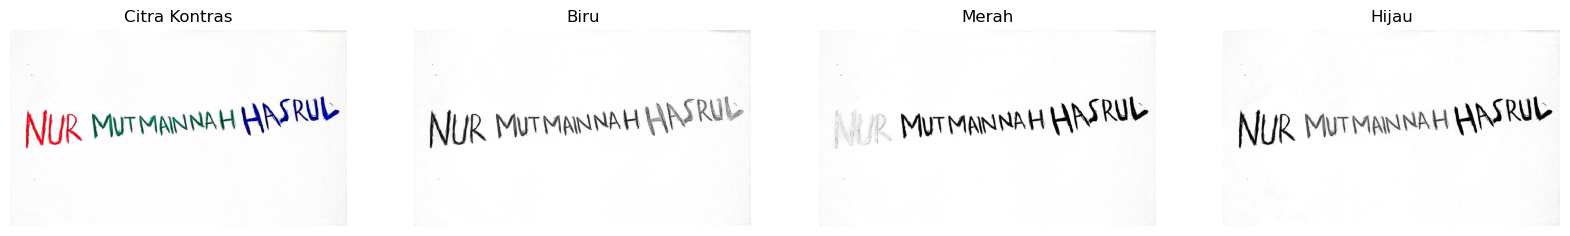

In [12]:
red = image[:, :, 0]
green = image[:, :, 1]
blue = image[:, :, 2]

f, (y1, y2, y3, y4) = plt.subplots(1, 4, figsize = (20,10))

y1.set_title('Citra Kontras')
y1.imshow(image)
y1.axis('off')

y2.set_title('Biru')
y2.imshow(blue, cmap='gray')
y2.axis('off')

y3.set_title('Merah')
y3.imshow(red, cmap='gray')
y3.axis('off')

y4.set_title('Hijau')
y4.imshow(green, cmap='gray')
y4.axis('off')

## HISTOGRAM WARNA PADA CITRA

In [13]:
histogram_biru = cv2.calcHist([blue], [0], None, [256], [0, 256])
histogram_hijau = cv2.calcHist([green], [0], None, [256], [0, 256])
histogram_merah = cv2.calcHist([red], [0], None, [256], [0, 256])

(0.0, 256.0)

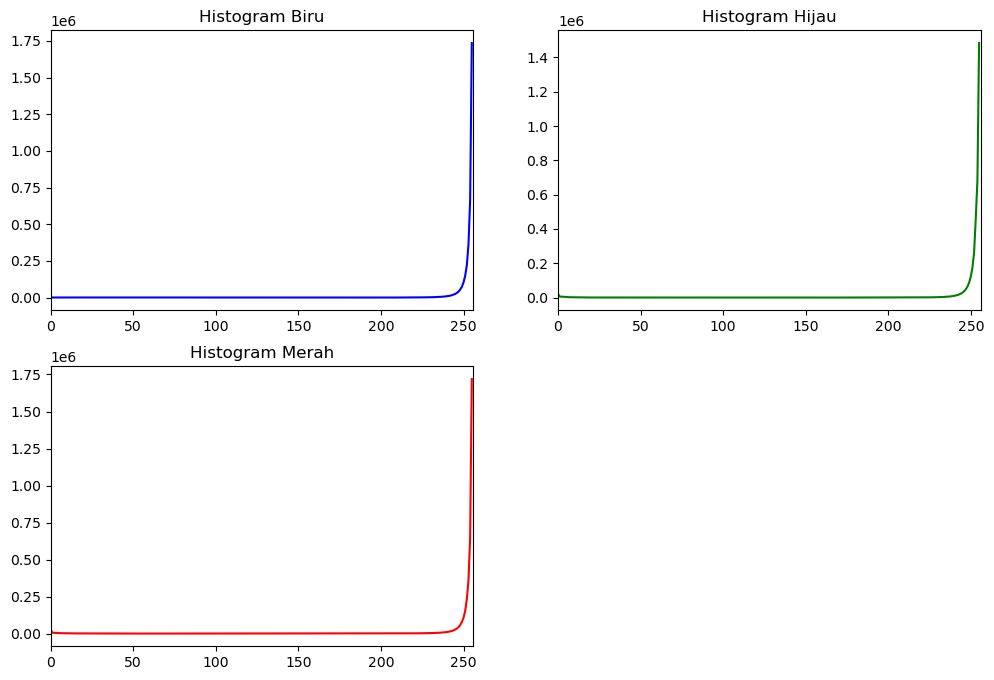

In [14]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)  
plt.plot(histogram_biru, color='blue')
plt.title('Histogram Biru')
plt.xlim([0, 256])

plt.subplot(2, 2, 2)  
plt.plot(histogram_hijau, color='green')
plt.title('Histogram Hijau')
plt.xlim([0, 256])

plt.subplot(2, 2, 3) 
plt.plot(histogram_merah, color='red')
plt.title('Histogram Merah')
plt.xlim([0, 256])


## MENCARI NILAI AMBANG BATAS

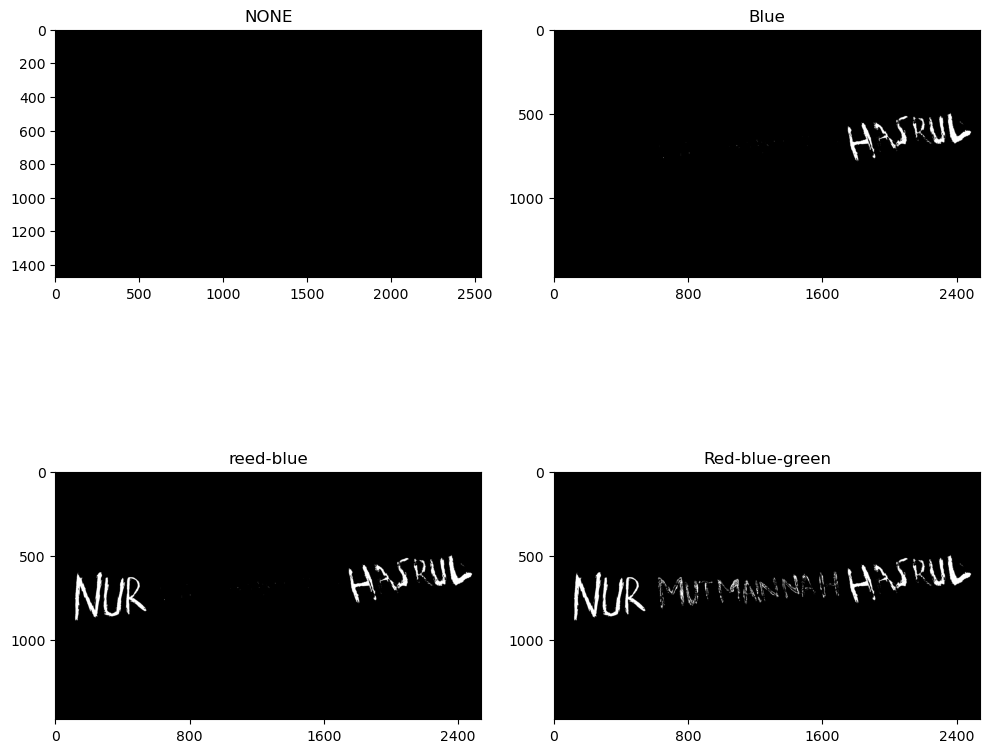

In [17]:
color_image = cv2.imread('Praktikum.JPG')

hsv_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2HSV)

low_blue = np.array([90, 100, 100])
up_blue = np.array([130, 255, 255])

low_green = np.array([75, 100, 100])
up_green = np.array([85, 255, 255])

low_red1 = np.array([0, 100, 100])
up_red1 = np.array([10, 255, 255])
low_red2 = np.array([160, 100, 100])
up_red2 = np.array([180, 255, 255])


mask_blue = cv2.inRange(hsv_image, low_blue, up_blue)
mask_green = cv2.inRange(hsv_image, low_green, up_green)
mask_red1 = cv2.inRange(hsv_image, low_red1, up_red1)
mask_red2 = cv2.inRange(hsv_image, low_red2, up_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)


mask_red_blue = cv2.bitwise_or(mask_red, mask_blue)
mask_red_blue_green = cv2.bitwise_or(cv2.bitwise_or(mask_red, mask_blue), mask_green)


gray = cv2.cvtColor(color_image, cv2.COLOR_RGB2GRAY)
fig, axs = plt.subplots (2, 2, figsize=(10,10))

(thresh, binary1) = cv2.threshold(gray, 0, 0, cv2.THRESH_BINARY)
axs[0,0].imshow(binary1, cmap = 'gray')
axs[0,0].set_title('NONE')


plt.subplot(2, 2, 2)
plt.imshow(mask_blue, cmap='gray')
plt.title('Blue')
plt.xticks(np.arange(0, mask_blue.shape[1]+1, 800))
plt.yticks(np.arange(0, mask_blue.shape[0]+1, 500))
plt.axis('on')


plt.subplot(2, 2, 3)
plt.imshow(np.maximum(mask_red, mask_blue), cmap='gray')
plt.title('reed-blue')
plt.xticks(np.arange(0, mask_green.shape[1], 800))
plt.yticks(np.arange(0, mask_green.shape[0], 500))
plt.axis('on')


plt.subplot(2, 2, 4)
plt.imshow(mask_red_blue_green, cmap='gray')
plt.title('Red-blue-green')
plt.xticks(np.arange(0, mask_green.shape[1], 800))
plt.yticks(np.arange(0, mask_green.shape[0], 500))
plt.axis('on')

#menampilkan output
plt.tight_layout()
plt.show()